In [1]:
import numpy as np
import matplotlib.pyplot as plt
import speech_recognition as sr
from scipy.io import wavfile 
from scipy.fftpack import fft
from python_speech_features import mfcc, logfbank

In [10]:
#spoken word recognition
recording = sr.Recognizer()
with sr.Microphone() as source: 
    recording.adjust_for_ambient_noise(source)
    print("Please Say something:")
    audio = recording.listen(source)
    try:
        print("You said: \n" + recording.recognize_google(audio))
    except Exception as e:
        print(e)

Please Say something:
You said: 
I'm a motherfuking Starboy


Feature Extraction from Speech


In [2]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 32A6-5CEF

 Directory of C:\Users\gr8\Documents\STA141C\soundAnalysis

06/08/2019  02:09 PM    <DIR>          .
06/08/2019  02:09 PM    <DIR>          ..
06/01/2019  07:09 PM    <DIR>          .ipynb_checkpoints
06/08/2019  01:54 PM        30,863,438 AtTheClub.wav
06/08/2019  01:54 PM        25,382,990 FineChina.wav
06/08/2019  01:49 PM        32,718,926 GetMine.wav
06/08/2019  01:36 PM        34,263,118 HotBoy.wav
06/08/2019  01:44 PM        44,720,206 ILikeIt.wav
06/08/2019  01:55 PM        29,495,374 jungle.wav
06/01/2019  07:13 PM        43,545,694 MLKDream.wav
06/08/2019  01:26 PM        38,457,422 Rockstar.wav
05/12/2019  09:33 AM        38,940,750 SongKilledBeforeYoungThug.wav
06/08/2019  02:09 PM           112,076 soundAnalysisPractice.ipynb
06/08/2019  01:28 PM        40,763,470 Starboy.wav
06/08/2019  01:59 PM        45,523,022 StTropez.wav
06/08/2019  01:22 PM        27,926,606 Sunflower.wav
              13 File(s)    4


MFCC:
Number of windows = 67
Length of each feature = 13
[[  1.20876091e+01   1.23322196e+01   1.24749381e+01   1.24100368e+01
    1.22991590e+01   1.25258651e+01   1.33823447e+01   1.39383910e+01
    1.44886303e+01   1.45412841e+01   1.44397605e+01   1.42062677e+01
    1.45113823e+01   1.46089519e+01   1.48071316e+01   1.51277665e+01
    1.56652446e+01   1.70734756e+01   1.75410035e+01   1.82207428e+01
    1.84556244e+01   1.85889704e+01   1.86351453e+01   1.87283206e+01
    1.87258878e+01   1.87000791e+01   1.84595913e+01   1.79776814e+01
    1.77524212e+01   1.74401689e+01   1.71989525e+01   1.64452154e+01
    1.70416442e+01   1.81940233e+01   1.86038846e+01   1.90646559e+01
    1.91454053e+01   1.94288922e+01   1.97711188e+01   1.99913788e+01
    1.98878017e+01   1.96251222e+01   1.94643288e+01   1.94426691e+01
    1.94424186e+01   1.94179543e+01   1.95154002e+01   1.95952648e+01
    1.95103329e+01   1.91687513e+01   1.86454302e+01   1.80645520e+01
    1.73397983e+01   1.64891971e

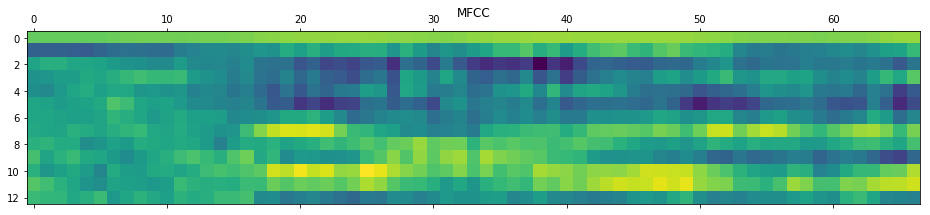

In [6]:
def plotMFCC(soundFile):
    frequency_sampling, audio_signal = wavfile.read(soundFile)
    audio_signal = audio_signal[:15000]
    features_mfcc = mfcc(audio_signal, frequency_sampling)
    print('\nMFCC:\nNumber of windows =', features_mfcc.shape[0])
    print('Length of each feature =', features_mfcc.shape[1])
    features_mfcc = features_mfcc.T
    print(features_mfcc)
    plt.matshow(features_mfcc)
    plt.title('MFCC')
    plt.show()
plotMFCC("MLKDream.wav")


Filter bank:
Number of windows = 67
Length of each feature = 26


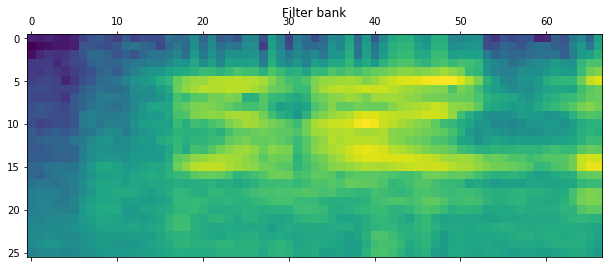

In [34]:
filterbank_features = logfbank(audio_signal, frequency_sampling)
print('\nFilter bank:\nNumber of windows =', filterbank_features.shape[0])
print('Length of each feature =', filterbank_features.shape[1])
filterbank_features = filterbank_features.T
plt.matshow(filterbank_features)
plt.title('Filter bank')
plt.show()


Signal shape: (21772800,)
Signal Datatype: int16
Signal duration: 987.43 seconds


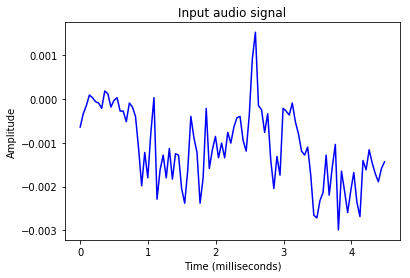

In [50]:
frequency_sampling, audio_signal = wavfile.read("MLKDream.wav")
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] / 
float(frequency_sampling), 2), 'seconds')
audio_signal = audio_signal / np.power(2, 15)
audio_signal = audio_signal [:100]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

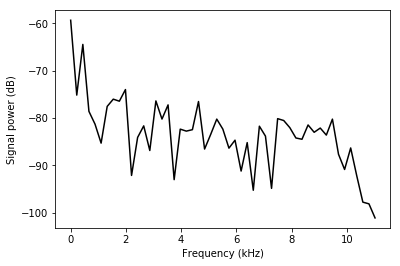

In [58]:
length_signal = len(audio_signal)
half_length = np.ceil((length_signal + 1) / 2.0).astype(np.int)
#fourier transform
signal_frequency = np.fft.fft(audio_signal)
signal_frequency = abs(signal_frequency[0:half_length]) / length_signal
signal_frequency **= 2
len_fts = len(signal_frequency)
if length_signal % 2:
    signal_frequency[1:len_fts] *= 2
else:
    signal_frequency[1:len_fts-1] *= 2
signal_power = 10 * np.log10(signal_frequency)
x_axis = np.arange(0, half_length, 1) * (frequency_sampling / length_signal) / 1000.0
plt.figure()
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

In [ ]:
#monotone audio signal

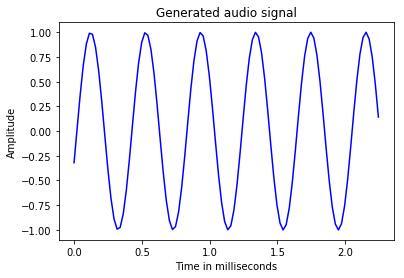

In [67]:
output_file = 'audio_signal_generated.wav'
duration = 12 # in seconds
frequency_sampling = 44100 # in Hz
frequency_tone = 784
min_val = -6 * np.pi
max_val = 6 * np.pi
#step 2
t = np.linspace(min_val, max_val, duration * frequency_sampling)
audio_signal = np.sin(2 * np.pi * frequency_tone * t)

#write(output_file, frequency_sampling, signal_scaled)
audio_signal = audio_signal[:100]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time in milliseconds')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()

In [9]:
rate, data = wavfile.read('Starboy.wav')
fft_out = fft(data)
%matplotlib inline
plt.plot(data, np.abs(fft_out))
plt.show()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>